In [11]:
### Importare librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
### Importare i dati da wine-clustering.csv e dare una breve occhiata alle caratteristiche del dataset
df = pd.read_csv('countries_of_the_world.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          227 non-null    int64  
 1   Country                             227 non-null    object 
 2   Region                              227 non-null    object 
 3   Population                          227 non-null    int64  
 4   Area (sq. mi.)                      227 non-null    int64  
 5   Pop. Density (per sq. mi.)          227 non-null    float64
 6   Coastline (coast/area ratio)        227 non-null    float64
 7   Net migration                       224 non-null    float64
 8   Infant mortality (per 1000 births)  224 non-null    float64
 9   GDP ($ per capita)                  226 non-null    float64
 10  Literacy (%)                        209 non-null    float64
 11  Phones (per 1000)                   223 non-n

In [14]:
df.head()

,Unnamed: 0,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [15]:
df = df.set_index('Country')

In [16]:
df = df.drop('Region', axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [17]:
df.isna().sum()

Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [18]:
df = df.fillna(df.mean()).copy()

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# HIERARCHICAL CLUSTERING

In [19]:
X = df.copy()

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## DENDROGRAM

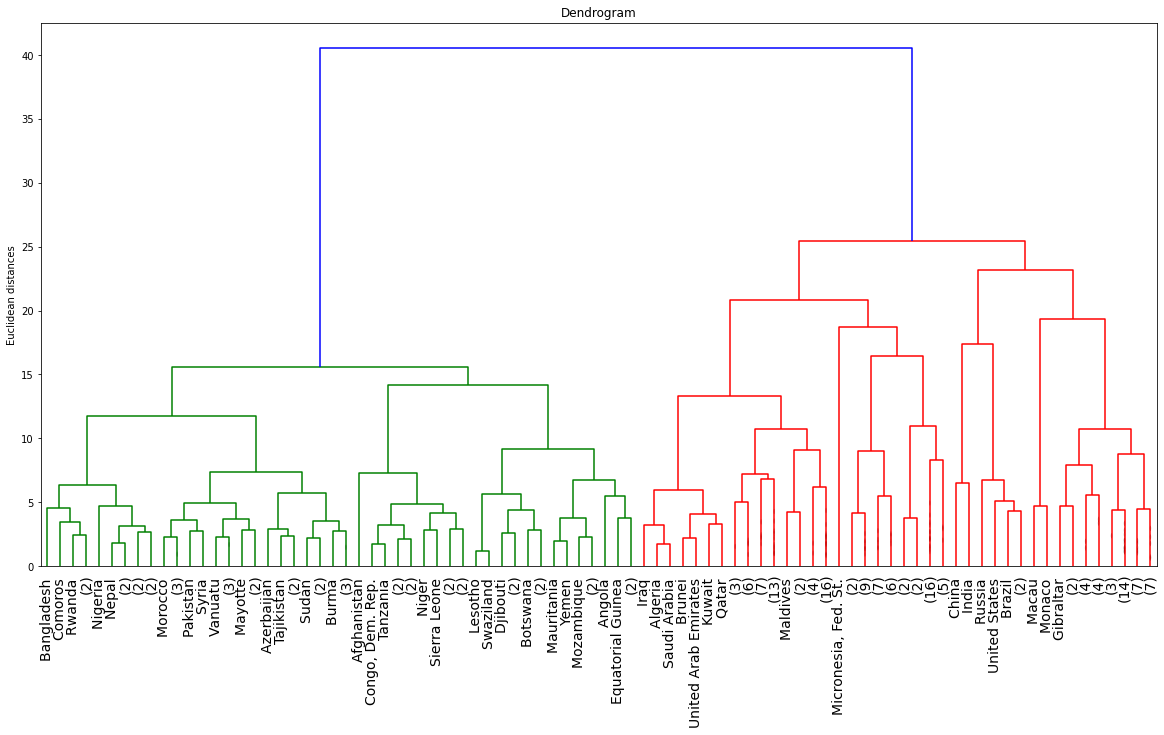

In [23]:
import scipy.cluster.hierarchy as sch #serve per definire il n di claster da usare dopo da dare in pasto all'algoritmo 

plt.figure(figsize=(20,10))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'), labels=X.index, p=6, truncate_mode='level', show_contracted=True)
plt.xticks(rotation=90, fontsize=14)
plt.show()

## AGGLOMERATIVE CLUSTERING

In [24]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
model = model.fit(X_scaled)
labels = model.labels_

In [25]:
labels = pd.Series(labels, index = X.index, name='labels')
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

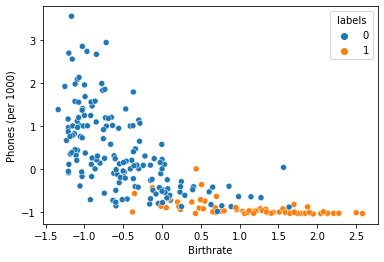

In [26]:
labels_df = X_scaled.join(labels)
sns.scatterplot(x='Birthrate', y='Phones (per 1000)', data=labels_df, hue='labels')
plt.show()

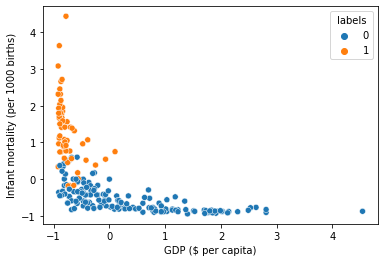

In [27]:
labels_df = X_scaled.join(labels)
sns.scatterplot(x='GDP ($ per capita)', y='Infant mortality (per 1000 births)', data=labels_df, hue='labels')
plt.show()

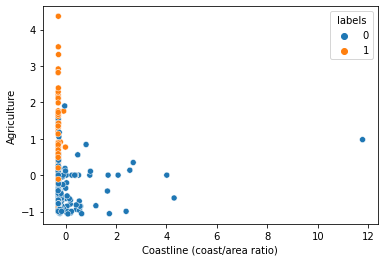

In [28]:
labels_df = X_scaled.join(labels)
sns.scatterplot(x='Coastline (coast/area ratio)', y='Agriculture', data=labels_df, hue='labels')
plt.show()

In [32]:
print(labels_df[labels_df['labels']==0].index)

Index(['Albania ', 'Algeria ', 'American Samoa ', 'Andorra ', 'Anguilla ',
       'Antigua & Barbuda ', 'Argentina ', 'Armenia ', 'Aruba ', 'Australia ',
       ...
       'United Arab Emirates ', 'United Kingdom ', 'United States ',
       'Uruguay ', 'Venezuela ', 'Vietnam ', 'Virgin Islands ',
       'Wallis and Futuna ', 'West Bank ', 'Western Sahara '],
      dtype='object', name='Country', length=160)


In [33]:
print(labels_df[labels_df['labels']==1].index)

Index(['Afghanistan ', 'Angola ', 'Azerbaijan ', 'Bangladesh ', 'Benin ',
       'Bhutan ', 'Botswana ', 'Burkina Faso ', 'Burma ', 'Burundi ',
       'Cambodia ', 'Cameroon ', 'Central African Rep. ', 'Chad ', 'Comoros ',
       'Congo, Dem. Rep. ', 'Congo, Repub. of the ', 'Cote d'Ivoire ',
       'Djibouti ', 'East Timor ', 'Equatorial Guinea ', 'Eritrea ',
       'Ethiopia ', 'Gabon ', 'Gambia, The ', 'Ghana ', 'Guatemala ',
       'Guinea ', 'Guinea-Bissau ', 'Haiti ', 'Honduras ', 'Kenya ', 'Laos ',
       'Lesotho ', 'Liberia ', 'Madagascar ', 'Malawi ', 'Mali ',
       'Mauritania ', 'Mayotte ', 'Morocco ', 'Mozambique ', 'Namibia ',
       'Nepal ', 'Nicaragua ', 'Niger ', 'Nigeria ', 'Pakistan ',
       'Papua New Guinea ', 'Rwanda ', 'Senegal ', 'Sierra Leone ', 'Somalia ',
       'South Africa ', 'Sudan ', 'Swaziland ', 'Syria ', 'Tajikistan ',
       'Tanzania ', 'Togo ', 'Turkmenistan ', 'Uganda ', 'Uzbekistan ',
       'Vanuatu ', 'Yemen ', 'Zambia ', 'Zimbabwe '],
     

In [34]:
print(labels_df[labels_df['labels']==2].index)

Index([], dtype='object', name='Country')


In [35]:
cond =labels_df["labels"] ==0
new_df= labels_df[cond].copy(0)

In [36]:
new_df.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,labels
Country,,,,,,,,,,,,,,,,,,,
Albania,-0.213877,-0.318797,-0.153603,-0.275974,-1.025201,-0.398754,-0.518735,0.193960,-0.731200,0.562986,-0.017364,-0.445827,1.298569,-0.632321,-0.814901,5.734169e-01,-7.121448e-01,0.085790,0
Algeria,0.035618,0.998421,-0.220490,-0.292889,-0.088346,-0.128489,-0.368806,-0.680038,-0.700597,-0.816517,-0.519408,0.928767,-1.717937,-0.449072,-0.938514,-3.521823e-01,2.385742e+00,-1.671672,0
American Samoa,-0.243834,-0.334779,-0.053514,0.514709,-4.281495,-0.747988,-0.168902,0.750140,0.103956,-0.293124,1.256409,-0.414019,-0.209684,0.031168,-1.210057,1.961110e-16,4.173963e-16,0.000000,0
Andorra,-0.243720,-0.334629,-0.137002,-0.293443,1.354081,-0.896805,0.930574,0.909049,1.158212,-0.893713,-0.549507,1.006727,1.298569,-1.210053,-0.606178,1.961110e-16,4.173963e-16,0.000000,0
Anguilla,-0.244210,-0.334834,-0.149075,0.535644,2.212520,-0.412723,-0.108930,0.644201,0.993221,-1.065089,-0.549507,1.145185,-0.209684,-0.717176,-0.790584,-7.831865e-01,-7.722980e-01,1.342908,0


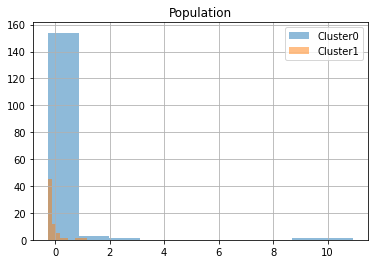

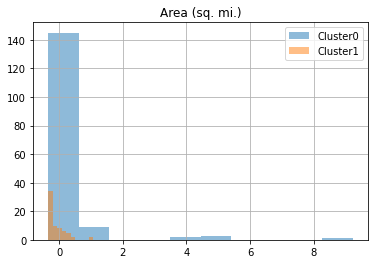

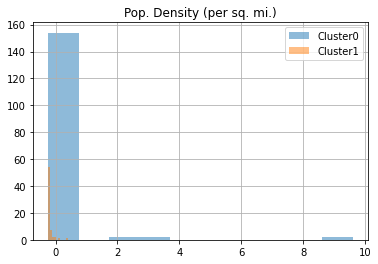

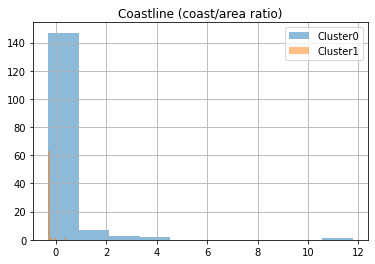

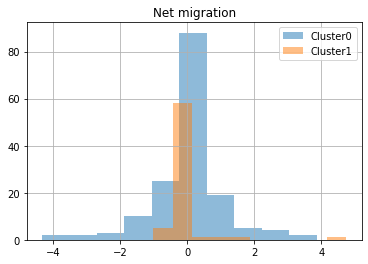

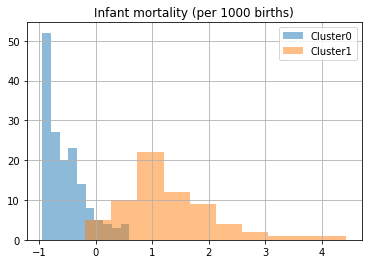

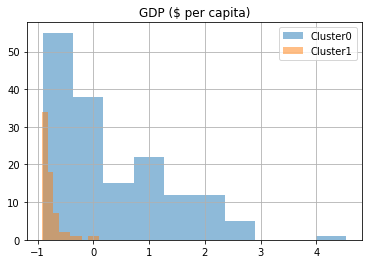

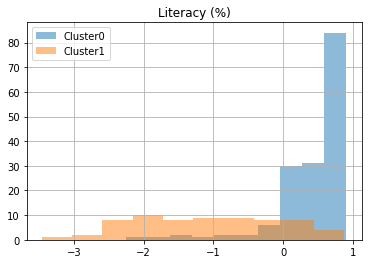

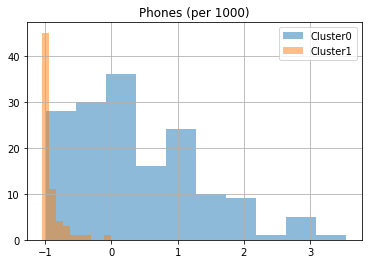

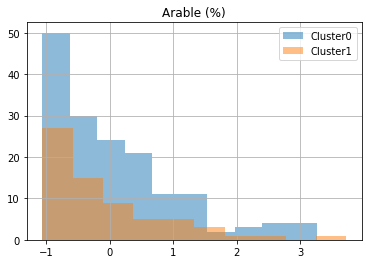

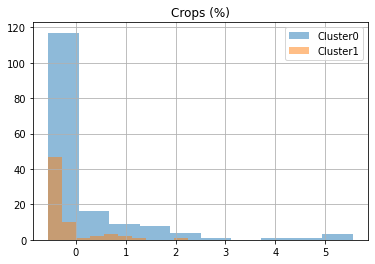

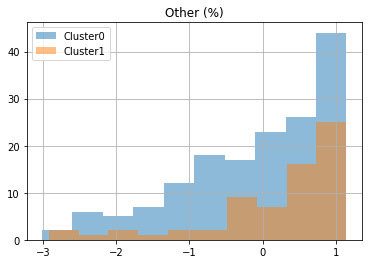

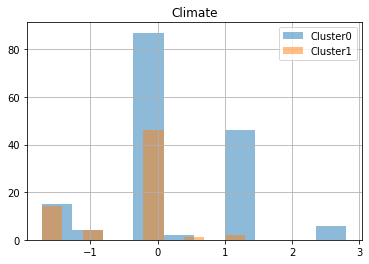

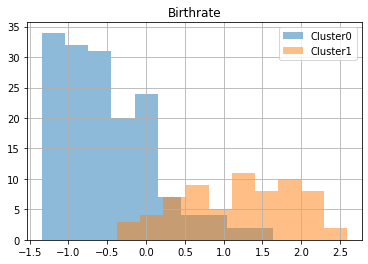

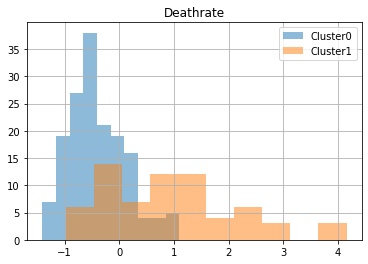

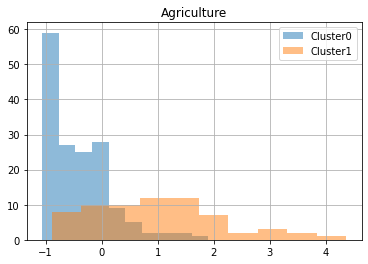

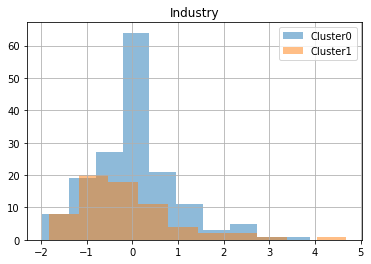

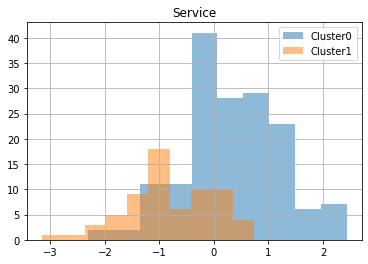

In [59]:
for feature in X.columns:
  for cluster in [0,1]:
    cond =labels_df ["labels"]==cluster
    new_df = labels_df[cond].copy()
    new_df[feature].hist(label="Cluster{}".format(cluster),alpha =0.5)
  plt.title(feature)
  plt.legend()
  plt.show()
